In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
data ={
    "area" : [2600,3000,3200,3600,4000],
    "bedrooms" : [3.0,4.0,np.nan,3.0,5.0],
    "age" : [20,15,18,30,8],
    "price" : [550000,565000,610000,595000,760000]
}


In [3]:
df = pd.DataFrame(data)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [4]:
df.bedrooms.median()

np.float64(3.5)

In [5]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [6]:
df.bedrooms.fillna(median_bedrooms)


0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
Name: bedrooms, dtype: float64

In [7]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [8]:
reg  = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df[['price']]) #training model reg using dataset

LinearRegression()

In [9]:
reg.coef_

array([[   137.25, -26025.  ,  -6825.  ]])

In [10]:
reg.intercept_

array([383725.])

In [11]:
reg.predict([[3000,3,40]])

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[444400.]])

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- age
- bedrooms


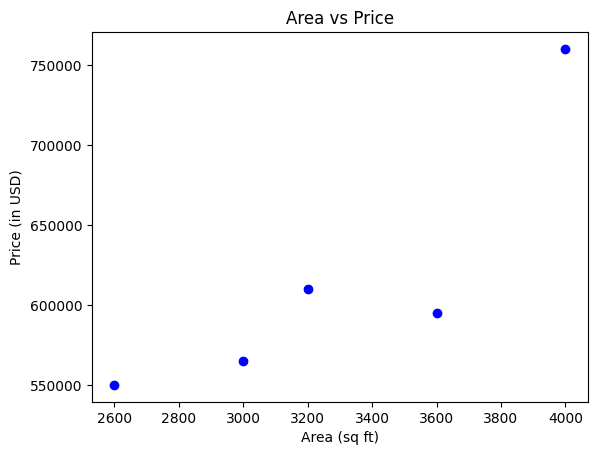

In [12]:
plt.scatter(df['area'], df['price'], color='b') 
plt.title('Area vs Price')  # Add a title
plt.xlabel('Area (sq ft)')  # Label for x-axis
plt.ylabel('Price (in USD)')  # Label for y-axis
plt.plot(df.area,reg.predict(df[['area']]),color='blue')